In [1]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import seaborn as sns
from api_keys import api_key
from api_keys2 import api_key2

## CleanUp The Data

In [15]:
df_new = pd.read_csv("output_data/Final_api_movie_2019.csv")
df_new = df_new[["Budget", "Revenue", "Vote Average"]]
df_new = df_new.replace(0,np.nan)
df_new = df_new.dropna()
df_new = df_new.reset_index(drop=True)

## Budget  VS  Average Vote

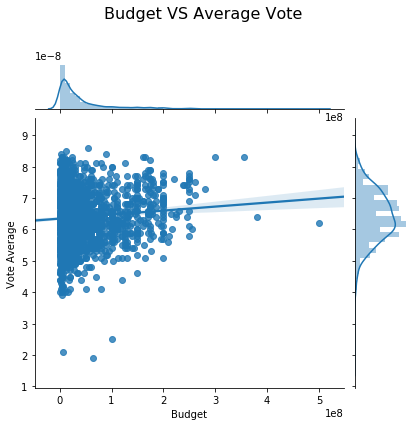

In [3]:
g = sns.jointplot("Budget", "Vote Average", data=df_new, kind="reg")
g.fig.subplots_adjust(top=.85)
g.fig.suptitle('Budget VS Average Vote', fontsize=16)
plt.savefig("Images/Average Vote vs Budget.png",dpi=300) #added
plt.show()

## Revenue VS  Average Vote

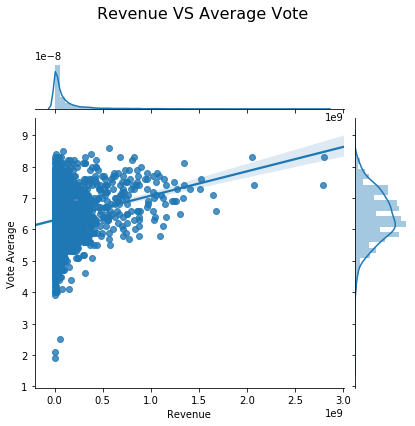

In [4]:
g = sns.jointplot("Revenue", "Vote Average", data=df_new, kind="reg")
g.fig.subplots_adjust(top=.85)
g.fig.suptitle('Revenue VS Average Vote', fontsize=16)
plt.savefig("Images/Average Vote vs Revenue.png",dpi=300) #added
plt.show()

## Profitable VS Average Vote

In [5]:
df_new["Profit"] = df_new["Revenue"]-df_new["Budget"]
df_new["Profitable"] = df_new["Revenue"]-df_new["Budget"]

df_new.loc[df_new.Profit <= 0, 'Profitable'] = 'Not Profitable' 
df_new.loc[df_new.Profit > 0, 'Profitable'] = 'Profitable' 


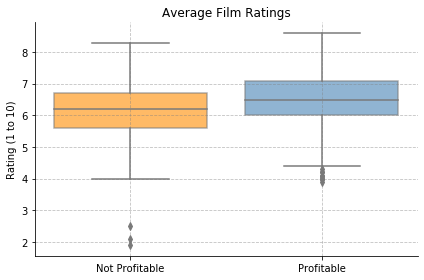

In [13]:
ratings_boxplot=sns.boxplot(x="Profitable",y="Vote Average",data=df_new, palette="coolwarm", order=["Not Profitable","Profitable"], boxprops=dict(alpha=0.6))
# Change the facecolors to be consistent with the other charts
ratings_boxplot.artists[0].set_facecolor("darkorange")
ratings_boxplot.artists[1].set_facecolor("steelblue")

plt.grid(True,color="grey",linestyle="--",alpha=0.5)
sns.despine()
plt.xlabel("")
plt.ylabel("Rating (1 to 10)")
plt.title("Average Film Ratings")
plt.tight_layout()

# Show chart and save
plt.savefig("Images/film_ratings_boxplot.png")
plt.show()